In [14]:
from ananke.configurations.collection import HDF5StorageConfiguration
from olympus.configuration.generators import EventGeneratorConfiguration
from olympus.configuration.generators import GenerationConfiguration
from olympus.event_generation.medium import MediumEstimationVariant
from olympus.configuration.generators import UniformSpectrumConfiguration
from ananke.schemas.event import EventType
from olympus.configuration.photon_propagation import (
    MockPhotonPropagatorConfiguration,
    NormalFlowPhotonPropagatorConfiguration,
)
from ananke.configurations.detector import DetectorConfiguration
from olympus.configuration.generators import DatasetConfiguration
from olympus.event_generation.generators import generate

import logging
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
modules_per_line = 20
distance_between_modules = 50.0  # m
dark_noise_rate = 16 *1e-5  # 1/ns
module_radius = 0.21  # m
pmt_efficiency = 0.42  # by Christian S.
pmt_area_radius = 75e-3 / 2.0  # m

detector = DetectorConfiguration.parse_obj(
    {
        "string": {
            "module_number": modules_per_line,
            "module_distance": distance_between_modules,
        },
        "pmt": {
            "efficiency": pmt_efficiency,
            "noise_rate": dark_noise_rate,
            "area": pmt_area_radius,
        },
        "module": {"radius": module_radius},
        "geometry": {
            "type": "single",
        },
        "geometry":{
            "type":"hexagonal",
            "number_of_strings_per_side":3,
            "distance_between_strings":80
            
        },
        "seed": 1,
    }
)

In [ ]:
#times=np.array([])
for i in range(11,16):
    samples=10*i
    photon_propagator_configuration = MockPhotonPropagatorConfiguration(
        resolution=18000,
        medium=MediumEstimationVariant.PONE_OPTIMISTIC,
        max_memory_usage=int(2147483648 / 4)
    )

    configuration = DatasetConfiguration(
        detector=detector,
        generators=[
            GenerationConfiguration(
                generator=EventGeneratorConfiguration(
                    type=EventType.CASCADE,
                    spectrum=UniformSpectrumConfiguration(
                        log_minimal_energy=2.0,
                        log_maximal_energy=5.5
                    ),
                    source_propagator=photon_propagator_configuration
                ),
                number_of_samples=samples
            )
        ],
        storage=HDF5StorageConfiguration(
            data_path=f'data/timetest/{samples}.h5',
            read_only=False
        )
    )

    start_time=time.time()
    print(samples)
    collection = generate(configuration)
    end_time=time.time()-start_time
    times=np.append(times,end_time)
    print(times)

110


100%|██████████| 2/2 [00:18<00:00,  9.48s/it]


[  44.32        96.849      115.55       190.575      310.83
  326.91       422.025      539.15      1006.56      1396.36
 1480.9392755]
120


 51%|█████     | 42/82 [09:07<07:02, 10.55s/it]

In [24]:
times=[44.32,96.849,115.55,190.575,310.83,326.91,422.025,539.15,1006.56,1396.36]

In [25]:
times=np.array(times)
samples=np.arange(5,51,5)
samples=np.append(samples,[110,120,130,140,150])

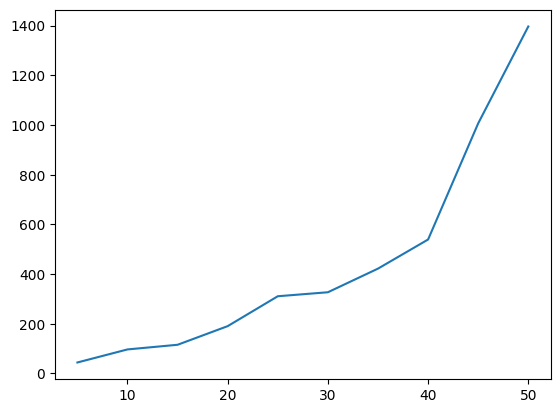

In [23]:
plt.scatter(samples,times)
plt.xlabel('sample size')
plt.ylabel('time in seconds')
plt.show()